In [1]:
import os
import pandas as pd
import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/JH/anaconda2/envs/energy_data/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/JH/anaconda2/envs/energy_data/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


---
* data file들은 아래와 같이 3가지 종류로 구분됨

In [2]:
repository_path = '/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT'

file_path = os.path.join(repository_path, 'VTT_GW1_HA10_VM_EP_KV_K.bin')
data_1 = pickle.load(open(file_path))

file_path = os.path.join(repository_path, 'VTT_GW1_HA10_VM_KV_K.bin')
data_2 = pickle.load(open(file_path))

file_path = os.path.join(repository_path, 'VTT_GW1_HA10_VM_KV_KAM.bin')
data_3 = pickle.load(open(file_path))

---
* 출력해 보면 data_1와 data_3은 서로 ts값 간격이 일치함을 알 수 있음

In [3]:
print "data_1 : "
print data_1
print

print "data_2 : "
print data_2
print

print "data_3 : "
print data_3

data_1 : 
{'ts': array([[datetime.datetime(2013, 5, 15, 10, 37, 23), 23, 37, ..., 2, 15, 5],
       [datetime.datetime(2013, 5, 15, 10, 42, 30), 30, 42, ..., 2, 15, 5],
       [datetime.datetime(2013, 5, 15, 10, 47, 30), 30, 47, ..., 2, 15, 5],
       ..., 
       [datetime.datetime(2015, 6, 30, 0, 46, 32), 32, 46, ..., 1, 30, 6],
       [datetime.datetime(2015, 6, 30, 0, 51, 32), 32, 51, ..., 1, 30, 6],
       [datetime.datetime(2015, 6, 30, 0, 56, 32), 32, 56, ..., 1, 30, 6]], dtype=object), 'value': array([     0.,      0.,      0., ...,  24826.,  24826.,  24826.])}

data_2 : 
{'ts': array([[datetime.datetime(2013, 4, 1, 23, 43, 16), 16, 43, ..., 0, 1, 4],
       [datetime.datetime(2013, 4, 1, 23, 48, 16), 16, 48, ..., 0, 1, 4],
       [datetime.datetime(2013, 4, 1, 23, 50, 32), 32, 50, ..., 0, 1, 4],
       ..., 
       [datetime.datetime(2015, 6, 30, 0, 48, 12), 12, 48, ..., 1, 30, 6],
       [datetime.datetime(2015, 6, 30, 0, 53, 12), 12, 53, ..., 1, 30, 6],
       [datetime.date

---
* 해당 data들을 직관적으로 볼 수 있도록 시각화 하여 보면...

In [4]:
df_1 = pd.DataFrame()
df_1['ts'] = data_1['ts'][:, 0]
df_1['value'] = data_1['value']

df_1.head()

,ts,value
0,2013-05-15 10:37:23,0.0
1,2013-05-15 10:42:30,0.0
2,2013-05-15 10:47:30,0.0
3,2013-05-15 10:52:30,0.0
4,2013-05-15 10:57:31,0.0


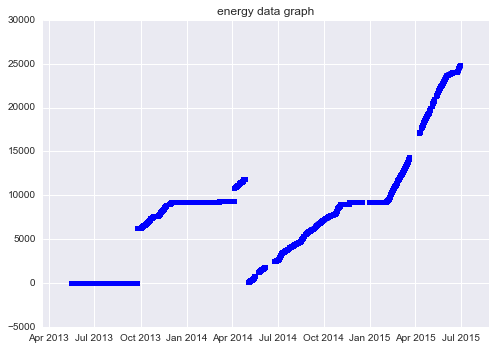

In [5]:
plt.title('energy data graph')
plt.scatter(x=df_1['ts'].tolist(), y=df_1['value'], color='b', marker='o')
plt.show()

In [6]:
df_2 = pd.DataFrame()
df_2['ts'] = data_2['ts'][:, 0]
df_2['value'] = data_2['value']

df_2.head()

,ts,value
0,2013-04-01 23:43:16,2964.0
1,2013-04-01 23:48:16,2964.0
2,2013-04-01 23:50:32,2964.0
3,2013-04-01 23:55:32,2964.0
4,2013-04-02 00:00:32,2964.0


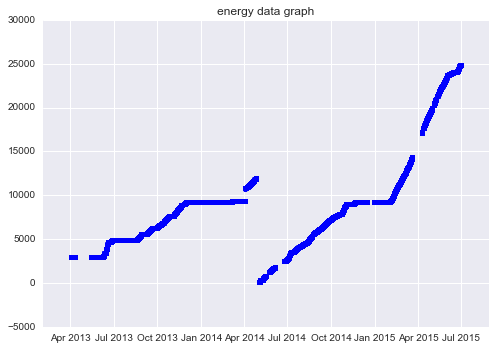

In [7]:
plt.title('energy data graph')
plt.scatter(x=df_2['ts'].tolist(), y=df_2['value'], color='b', marker='o')
plt.show()

In [8]:
df_3 = pd.DataFrame()
df_3['ts'] = data_3['ts'][:, 0]
df_3['value'] = data_3['value']

df_3.head()

,ts,value
0,2013-04-01 23:43:16,0.0
1,2013-04-01 23:48:16,0.0
2,2013-04-01 23:50:32,0.0
3,2013-04-01 23:55:32,0.0
4,2013-04-02 00:00:32,0.0


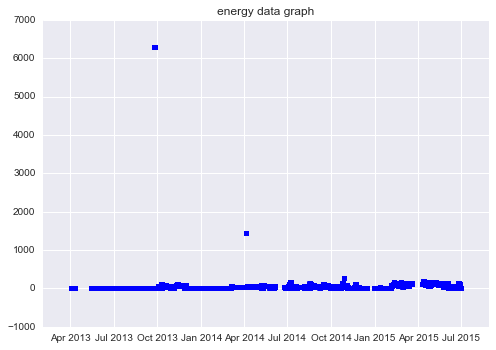

In [9]:
plt.title('energy data graph')
plt.scatter(x=df_3['ts'].tolist(), y=df_3['value'], color='b', marker='o')
plt.show()

* data_1과 data_2의 data가 비슷한 분포를 보임  

---

In [10]:
import numpy as np

def present_value(cumulative_value):
    """
    - 입력받은 data 를 누적 data 라고 가정한 뒤,
    - 순간 data 를 계산하기 위해
    - 이웃한 time stamp 사이 value 의 변화량을 기록하여 반환함

    :param cumulative_value:
        original data 로 cumulative 한 data 라고 가정함
        - type: np.array
            - shape: (length, 1)
    :return:
        계산된 현재 값 value data
        - type: np.array
            - shape: (length, 1)
    """
    forward_shifted_value = cumulative_value[1:]
    forward_shifted_value = np.hstack((forward_shifted_value, cumulative_value[-1]))

    present_value = forward_shifted_value - cumulative_value

    return present_value

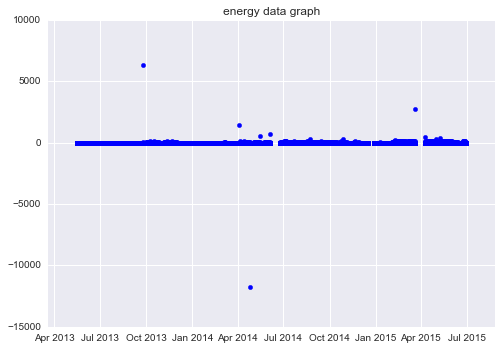

In [11]:
data_1['present_value'] = present_value(data_1['value'])

plt.title('energy data graph')
plt.scatter(x=data_1['ts'][:, 0], y=data_1['present_value'], color='b', marker='o')
plt.show()

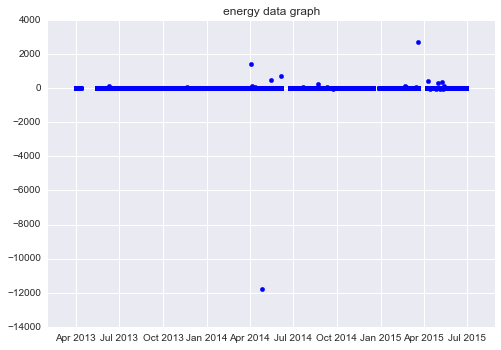

In [12]:
data_2['present_value'] = present_value(data_2['value'])

plt.title('energy data graph')
plt.scatter(x=data_2['ts'][:, 0], y=data_2['present_value'], color='b', marker='o')
plt.show()